<a href="https://colab.research.google.com/github/mokshmahajan2004/AI-Lab-Assignments/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:**Moksh Mahajan**  

Roll No:**102206084**

Subgroup:**3F1C**

Q1.The eight-queens problem poses the question of how eight queens can be placed on a chessboard without any queen attacking another queen. The problem is illustrated in the figure. Find out the solution to the eight queens problem by CSP implementation. Carefully define variables, domains, and constraints for a given problem.

Solution:

The goal is to place 8 queens on a chessboard such that:



*  No two queens occupy the same row.
* No two queens occupy the same column.
*  No two queens occupy the same diagonal.


Constraint Satisfaction Problem (CSP) Formulation
1. Variables

  Each queen is placed in a different row, hence:

  Qi denotes the column position of the queen in row i, where i E {1,2,3....8}

2. Domains

  The domain of each variable Qi is:

  Di={1,2,3,..8}, representing the 8 possible columns in which a queen can be placed in row i.

3. Constraints

  The constraints ensure that no two queens can threaten each other:

  Row Constraint: Since each row has exactly one queen, this constraint is inherently satisfied by the formulation.

  Column Constraint: No two queens should be in the same column.

  $Q_i$$ \neq $$Q_j$  for i$ \neq $j.

  Diagonal Constraint: No two queens should be on the same diagonal.

    For left diagonals:
    $Q_i$$ - $$Q_j$ $ \neq $ i - j

    This ensures that no two queens lie on the same diagonal.

I have shown 5 solutions.There can be more number of solutions.

In [ ]:
solution_count = 0

def is_safe(board, row, col):
    for i in range(row):
        # Check column and diagonals
        if board[i] == col or abs(board[i] - col) == abs(i - row):
            return False
    return True

def solve_n_queens(board, row, n):
    global solution_count
    if row == n:
        if solution_count < 5:
            print_solution(board, n)
            solution_count += 1
        return

    for col in range(n):
        if is_safe(board, row, col):
            board[row] = col
            solve_n_queens(board, row + 1, n)

def print_solution(board, n):
    for i in range(n):
        row = ["."] * n
        row[board[i]] = "Q"
        print(" ".join(row))
    print("\n")

def n_queens(n=8):
    global solution_count
    solution_count = 0
    board = [-1] * n
    solve_n_queens(board, 0, n)

n_queens()


Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .


Q . . . . . . .
. . . . . Q . .
. . . . . . . Q
. . Q . . . . .
. . . . . . Q .
. . . Q . . . .
. Q . . . . . .
. . . . Q . . .


Q . . . . . . .
. . . . . . Q .
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. Q . . . . . .
. . . . Q . . .
. . Q . . . . .


Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
. . . . . Q . .
. . Q . . . . .


. Q . . . . . .
. . . Q . . . .
. . . . . Q . .
. . . . . . . Q
. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .




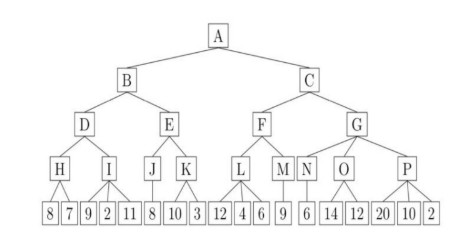

Q2.Consider the following tree-like graph shown in Fig. Suppose that the top level is a MAX node (the A node is the MAX node). Use the Minimax algorithm with alpha-beta pruning to determine what action A should take and the associated utility. That is, which direction should the player move from A (B or C), and why? Also indicate which nodes of the trees will be pruned using alpha-beta pruning using Python.

Solution:

The Minimax algorithm with Alpha-Beta Pruning determines that the best move from A is to B with a utility value of 7. The algorithm works by recursively evaluating the tree, where MAX nodes try to maximize the value and MIN nodes try to minimize it.

Alpha-Beta pruning eliminates unnecessary branches, improving efficiency. In this case, the pruned nodes are 2, J, 4, 6, and F, meaning they were skipped as they wouldn't affect the final decision. The Python implementation uses a recursive approach, storing pruned nodes and computing the best move by comparing values while pruning branches where beta <= alpha. Since B results in a higher utility than C, A should choose B.




In [1]:
import math

# Minimax function with Alpha-Beta Pruning
def minimax(node, depth, is_max, alpha, beta, tree, pruned_nodes):
    if node not in tree:
        return node  # Leaf node value

    if is_max:  # Maximizing Player
        max_eval = -math.inf
        for child in tree[node]:
            eval = minimax(child, depth + 1, False, alpha, beta, tree, pruned_nodes)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                pruned_nodes.append(child)  # Record pruned node
                break  # Prune remaining branches
        return max_eval
    else:  # Minimizing Player
        min_eval = math.inf
        for child in tree[node]:
            eval = minimax(child, depth + 1, True, alpha, beta, tree, pruned_nodes)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                pruned_nodes.append(child)  # Record pruned node
                break  # Prune remaining branches
        return min_eval

# Define the tree structure as a dictionary
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O', 'P'],
    'H': [8, 7],
    'I': [9, 2],
    'J': [11, 8],
    'K': [10, 3],
    'L': [12, 4],
    'M': [6, 9],
    'N': [6, 14],
    'O': [12, 20],
    'P': [10, 2]
}

# Identify the best move for A
pruned_nodes = []
alpha, beta = -math.inf, math.inf
best_move = None
best_value = -math.inf

for child in tree['A']:
    value = minimax(child, 1, False, alpha, beta, tree, pruned_nodes)
    if value > best_value:
        best_value = value
        best_move = child
    alpha = max(alpha, best_value)

# Output the result
print(f"Best move from A: {best_move}")
print(f"Utility value: {best_value}")
print(f"Pruned nodes: {pruned_nodes}")


Best move from A: B
Utility value: 7
Pruned nodes: [2, 'J', 4, 6, 'F']
